<a href="https://colab.research.google.com/github/LMAPcoder/Advanced-Computer-Vision/blob/main/ACV_sheet5_batchnorm_residual.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise sheet 5

Libraries

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

Dataset

Fashion MNIST dataset

This is a dataset of 60,000 28x28 grayscale images of 10 fashion categories, along with a test set of 10,000 images.

0	T-shirt/top

1	Trouser

2	Pullover

3	Dress

4	Coat

5	Sandal

6	Shirt

7	Sneaker

8	Bag

9	Ankle boot

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
print('input shape', train_images.shape)
# for _ in range(3):
#   arr = train_images[_]
#   print('label',train_labels[_])
#   img = Image.fromarray(arr.astype('uint8'))
#   img = img.resize((200, 200))
#   display(img)

4422102/4422102 [==============================] - 0s 0us/step
input shape (60000, 28, 28)


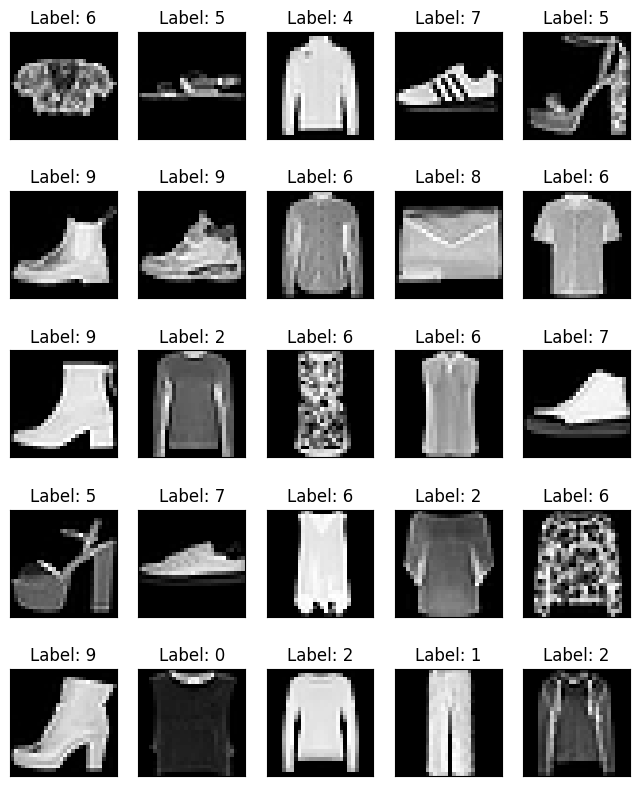

In [ ]:
#Printing a random subset of training dataset along with the labels

fig, ax = plt.subplots(nrows=5, ncols=5, figsize=(8,10))
for i in range(5):
    for j in range(5):
        idx = np.random.randint(train_images.shape[0])
        ax[i,j].set_title(f'Label: {train_labels[idx]}')
        ax[i,j].imshow(train_images[idx], cmap='gray')
        ax[i,j].axes.yaxis.set_visible(False)
        ax[i,j].axes.xaxis.set_visible(False)

In [3]:
# Load and preprocess training data (Fashion-MNIST)
# (train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.fashion_mnist.load_data()
train_images = train_images / 255.0 #normalizing the data
test_images = test_images / 255.0
train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

## Model with only 2D convolutional layers

In [4]:
def define_model(K):
    """
    This function create a CNN with 3 blocks of K 2D convolutional layers

    Args:
        K: number of 2D convolutional layers per block
    """

    inputs = keras.Input(shape=(28,28,1))

    L = 3  # number of blocks
    x = inputs
    for i in range(0,L):
        for j in range(0,K):
            # Add call to custom layer here: x = MyBatchNormalization()(x)
            x = layers.Conv2D(32, 3, activation="relu",padding="same")(x) #2D convolution layer
        x = layers.MaxPooling2D(3)(x) #Max pooling operation for 2D spatial data
    x = layers.GlobalMaxPooling2D()(x) #Global max pooling operation for spatial data.
    outputs = layers.Dense(10, activation='softmax')(x) #regular densely-connected NN layer

    model = keras.Model(inputs,outputs)
    model.summary() # show model overview
    return model

Model with K = 3

In [5]:
# Define and train model
K = 3
model_1 = define_model(K)
model_1.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 9, 9, 32)          0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 9, 9, 32)          9248      
                                                             

In [6]:
%%time
history_1 = model_1.fit(train_images,train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 19s 9ms/step - loss: 0.5763 - accuracy: 0.7900
Epoch 2/10
938/938 [==============================] - 10s 11ms/step - loss: 0.3329 - accuracy: 0.8769
Epoch 3/10
938/938 [==============================] - 9s 10ms/step - loss: 0.2752 - accuracy: 0.8987
Epoch 4/10
938/938 [==============================] - 8s 8ms/step - loss: 0.2445 - accuracy: 0.9093
Epoch 5/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2254 - accuracy: 0.9182
Epoch 6/10
938/938 [==============================] - 7s 8ms/step - loss: 0.2064 - accuracy: 0.9255
Epoch 7/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1928 - accuracy: 0.9301
Epoch 8/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1805 - accuracy: 0.9341
Epoch 9/10
938/938 [==============================] - 7s 7ms/step - loss: 0.1697 - accuracy: 0.9379
Epoch 10/10
938/938 [==============================] - 7s 8ms/step - loss: 0.1603 - accuracy: 0.

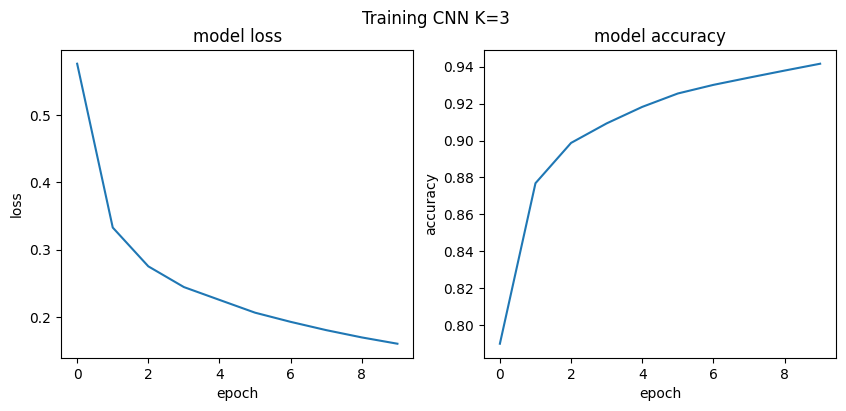

In [7]:
def plot_training_metrics(history):
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10,4))

    fig.suptitle(f'Training CNN K={K}')

    axes[0].plot(history.history['loss'])
    axes[0].set_title('model loss')
    axes[0].set_xlabel('epoch')
    axes[0].set_ylabel('loss')


    axes[1].plot(history.history['accuracy'])
    axes[1].set_title('model accuracy')
    axes[1].set_xlabel('epoch')
    axes[1].set_ylabel('accuracy')

    plt.show()

plot_training_metrics(history_1)

In [8]:
# Evaluation of model on test dataset
print("Performance on test data:")
loss, accuracy = model_1.evaluate(test_images, test_labels, verbose=2)

Performance on test data:
313/313 - 1s - loss: 0.2379 - accuracy: 0.9161 - 1s/epoch - 4ms/step


Model with K = 20

In [9]:
# Define and train model
K = 20
model_2 = define_model(K)
model_2.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 conv2d_10 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_11 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_12 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_13 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 conv2d_14 (Conv2D)          (None, 28, 28, 32)        9248

In [10]:
%%time
history_2 = model_2.fit(train_images,train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 55s 41ms/step - loss: 2.3027 - accuracy: 0.0993
Epoch 2/10
938/938 [==============================] - 38s 40ms/step - loss: 2.3027 - accuracy: 0.0972
Epoch 3/10
938/938 [==============================] - 38s 40ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 4/10
938/938 [==============================] - 38s 41ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 5/10
938/938 [==============================] - 38s 40ms/step - loss: 2.3027 - accuracy: 0.0997
Epoch 6/10
938/938 [==============================] - 38s 40ms/step - loss: 2.3027 - accuracy: 0.0969
Epoch 7/10
938/938 [==============================] - 39s 41ms/step - loss: 2.3027 - accuracy: 0.0986
Epoch 8/10
938/938 [==============================] - 38s 41ms/step - loss: 2.3027 - accuracy: 0.1004
Epoch 9/10
938/938 [==============================] - 38s 40ms/step - loss: 2.3027 - accuracy: 0.0979
Epoch 10/10
938/938 [==============================] - 38s 40ms/step - loss: 2.302

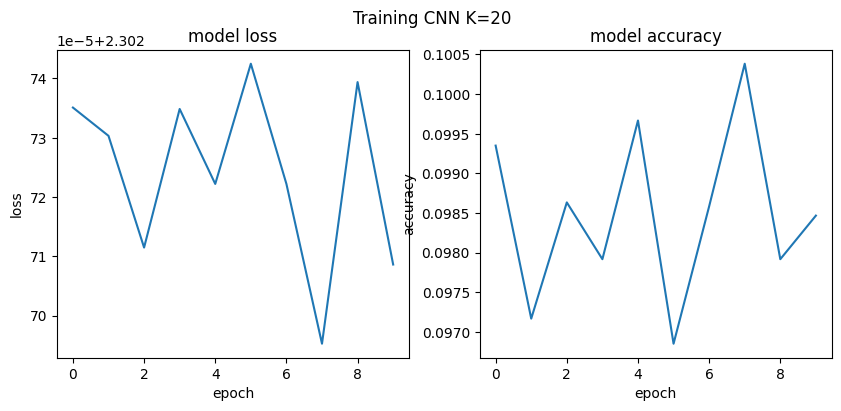

In [11]:
plot_training_metrics(history_2)

In [12]:
# Evaluation of model on test dataset
print("Performance on test data:")
loss, accuracy = model_2.evaluate(test_images, test_labels, verbose=2)

Performance on test data:
313/313 - 2s - loss: 2.3026 - accuracy: 0.1000 - 2s/epoch - 7ms/step


The model with 20 2D convolutional layers per block (K=20) has more than 7 times more parameters than the model with K=3. Besides having more parameters, the training accuracy stalls.

Possible reasons:

* Vanishing and exploding gradients
* Overfitting due ot overparametrization
* Internal coviarate shift

We hope to solve this issue using batch normalization layers and skip connections.

## Batch Normalization layer

Batch normalization addresses internal covariate shift by normalizing the input of each layer to have zero mean and unit variance. This helps to stabilize and speed up the training process.

Keras implementation of Batch normalization layer

In [13]:
def define_model(K):
    """
    This function create a CNN with 3 blocks of K 2D convolutional layers

    Args:
        K: number of 2D convolutional layers per block
    """

    inputs = keras.Input(shape=(28,28,1))

    L = 3  # number of blocks
    x = inputs
    for i in range(0,L):
        for j in range(0,K):
            x = layers.BatchNormalization()(x)
            x = layers.Conv2D(32, 3, activation="relu",padding="same")(x) #2D convolution layer
        x = layers.MaxPooling2D(3)(x) #Max pooling operation for 2D spatial data
    x = layers.GlobalMaxPooling2D()(x) #Global max pooling operation for spatial data.
    outputs = layers.Dense(10, activation='softmax')(x) #regular densely-connected NN layer

    model = keras.Model(inputs,outputs)
    # model.summary() # show model overview
    return model

In [14]:
%%time
K = 20
model_3 = define_model(K)
model_3.compile(loss=keras.losses.CategoricalCrossentropy(), optimizer=keras.optimizers.Adam(), metrics=["accuracy"])

history_3 = model_3.fit(train_images,train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 88s 59ms/step - loss: 2.2829 - accuracy: 0.1344
Epoch 2/10
938/938 [==============================] - 54s 58ms/step - loss: 1.2460 - accuracy: 0.4993
Epoch 3/10
938/938 [==============================] - 55s 58ms/step - loss: 0.8122 - accuracy: 0.6889
Epoch 4/10
938/938 [==============================] - 55s 58ms/step - loss: 0.6856 - accuracy: 0.7421
Epoch 5/10
938/938 [==============================] - 55s 58ms/step - loss: 0.6043 - accuracy: 0.7776
Epoch 6/10
938/938 [==============================] - 55s 59ms/step - loss: 0.5540 - accuracy: 0.7997
Epoch 7/10
938/938 [==============================] - 54s 58ms/step - loss: 0.5092 - accuracy: 0.8170
Epoch 8/10
938/938 [==============================] - 65s 69ms/step - loss: 0.4780 - accuracy: 0.8272
Epoch 9/10
938/938 [==============================] - 56s 60ms/step - loss: 0.4588 - accuracy: 0.8345
Epoch 10/10
938/938 [==============================] - 57s 61ms/step - loss: 0.437

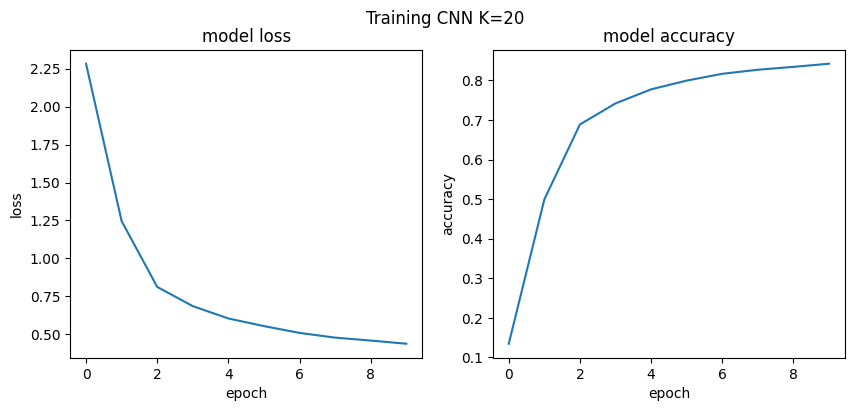

In [15]:
plot_training_metrics(history_3)

In [16]:
# Evaluation of model on test dataset
print("Performance on test data:")
loss, accuracy = model_3.evaluate(test_images, test_labels, verbose=2)

Performance on test data:
313/313 - 4s - loss: 0.5005 - accuracy: 0.8311 - 4s/epoch - 12ms/step


We can notice how the batch normalization layers are effective to allow the training algorithm to move forward besides the number of 2D convolutional layers per block.

Own implementation of Batch normalization layer

In [17]:
#MyBatchNormalization

class MyBatchNormalization(layers.Layer):
    def __init__(self): #do input-independent initialization
        super(MyBatchNormalization, self).__init__()

    def build(self, input_shape): #define the shapes of the input tensors and can do the rest of the initialization
        dim = input_shape[-1] # number of channels

        self.gamma = self.add_weight(
            name="gamma",
            shape=(dim,),
            initializer='ones',
            trainable = True #trainable parameter
            )

        self.beta = self.add_weight(
            name="beta",
            shape=(dim,),
            initializer='zeros',
            trainable = True #trainable parameter
            )

        self.moving_mean = self.add_weight(shape=(dim,),
                                           name='moving_mean',
                                           initializer='zeros',
                                           trainable=False
                                           )

        self.moving_variance = self.add_weight(shape=(dim,),
                                               name='moving_variance',
                                               initializer='ones',
                                               trainable=False
                                               )

        super(MyBatchNormalization, self).build(input_shape)

    def call(self, inputs, training=None):
        if training:
            batch_mean, batch_variance = tf.nn.moments(inputs, axes=list(range(len(inputs.shape) - 1)))
            # Update the moving averages of mean and variance
            self.moving_mean.assign(batch_mean)
            self.moving_variance.assign(batch_variance)
            mean, variance = batch_mean, batch_variance
        else:
            mean, variance = self.moving_mean, self.moving_variance

        z = (inputs - mean) / tf.sqrt(variance + 1e-5)
        return self.gamma * z + self.beta


In [18]:
def define_model(K):
    """
    This function create a CNN with 3 blocks of K 2D convolutional layers

    Args:
        K: number of 2D convolutional layers per block
    """

    inputs = keras.Input(shape=(28,28,1))

    L = 3  # number of blocks
    x = inputs
    for i in range(0,L):
        for j in range(0,K):
            x = MyBatchNormalization()(x) #onw batch normalization
            x = layers.Conv2D(32, 3, activation="relu",padding="same")(x) #2D convolution layer
        x = layers.MaxPooling2D(3)(x) #Max pooling operation for 2D spatial data
    x = layers.GlobalMaxPooling2D()(x) #Global max pooling operation for spatial data.
    outputs = layers.Dense(10, activation='softmax')(x) #regular densely-connected NN layer

    model = keras.Model(inputs,outputs)
    model.summary() # show model overview
    return model

In [19]:
# Define and train model
K = 20
model_4 = define_model(K)
model_4.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 my_batch_normalization (My  (None, 28, 28, 1)         4         
 BatchNormalization)                                             
                                                                 
 conv2d_129 (Conv2D)         (None, 28, 28, 32)        320       
                                                                 
 my_batch_normalization_1 (  (None, 28, 28, 32)        128       
 MyBatchNormalization)                                           
                                                                 
 conv2d_130 (Conv2D)         (None, 28, 28, 32)        9248      
                                                                 
 my_batch_normalization_2 (  (None, 28, 28, 32)        128 

In [20]:
history_4 = model_4.fit(train_images,train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 148s 109ms/step - loss: 2.0269 - accuracy: 0.2181
Epoch 2/10
938/938 [==============================] - 98s 104ms/step - loss: 1.0916 - accuracy: 0.5827
Epoch 3/10
938/938 [==============================] - 98s 104ms/step - loss: 0.8353 - accuracy: 0.6827
Epoch 4/10
938/938 [==============================] - 98s 105ms/step - loss: 0.7274 - accuracy: 0.7262
Epoch 5/10
938/938 [==============================] - 98s 105ms/step - loss: 0.6588 - accuracy: 0.7521
Epoch 6/10
938/938 [==============================] - 98s 104ms/step - loss: 0.6145 - accuracy: 0.7703
Epoch 7/10
938/938 [==============================] - 98s 104ms/step - loss: 0.5747 - accuracy: 0.7861
Epoch 8/10
938/938 [==============================] - 98s 105ms/step - loss: 0.5365 - accuracy: 0.8057
Epoch 9/10
938/938 [==============================] - 98s 105ms/step - loss: 0.4929 - accuracy: 0.8201
Epoch 10/10
938/938 [==============================] - 98s 105ms/step - 

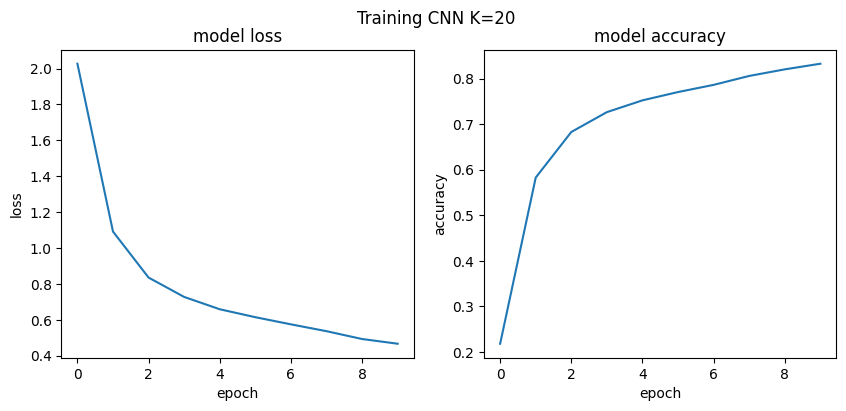

In [21]:
plot_training_metrics(history_4)

In [ ]:
# Evaluation of model on test dataset
print("Performance on test data:")
loss, accuracy = model_4.evaluate(test_images, test_labels, verbose=2)

The customized implementation of the batch normalization layer works as well as the keras implementation.

## Residual connections

Residual Connections are a type of skip-connection that learn residual functions with reference to the layer inputs, instead of learning unreferenced functions. These shortcuts help in training very deep networks by allowing gradients to flow more easily through the network, mitigating the vanishing gradient problem.

In [22]:
def define_model(K, M):
    """
    This function create a CNN with 3 blocks of K 2D convolutional layers

    Args:
        K: number of 2D convolutional layers per block
        M: number of layers within a residual block
    """

    inputs = keras.Input(shape=(28,28,1))

    L = 3  # number of blocks
    x = inputs
    k = -1
    for i in range(0,L):
        for j in range(0,K):

            if k % M == 0:
                # Save the input for the residual connection
                residual = x

            x = layers.Conv2D(32, 3, activation="relu",padding="same")(x) #2D convolution layer
            k += 1
            if (k + 1) % M == 0:
                # Add the residual connection
                W1 = residual.shape[1]
                W2 = x.shape[1]
                if W1 != W2:
                    stride = math.floor((W1-2)/(W2-1))

                    residual = layers.AveragePooling2D(pool_size=2, strides=stride)(residual)
                x = layers.add([x, residual])

        x = layers.MaxPooling2D(3)(x) #Max pooling operation for 2D spatial data

    x = layers.GlobalMaxPooling2D()(x) #Global max pooling operation for spatial data.
    outputs = layers.Dense(10, activation='softmax')(x) #regular densely-connected NN layer

    model = keras.Model(inputs,outputs)
    model.summary() # show model overview
    return model

In [23]:
# Define and train model
K = 20
M = 5
model_5 = define_model(K, M)
model_5.compile(loss=keras.losses.CategoricalCrossentropy(),optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

Model: "model_4"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_5 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_189 (Conv2D)         (None, 28, 28, 32)           320       ['input_5[0][0]']             
                                                                                                  
 conv2d_190 (Conv2D)         (None, 28, 28, 32)           9248      ['conv2d_189[0][0]']          
                                                                                                  
 conv2d_191 (Conv2D)         (None, 28, 28, 32)           9248      ['conv2d_190[0][0]']          
                                                                                            

In [24]:
%%time
history_5 = model_5.fit(train_images,train_labels, batch_size=64, epochs=10)

Epoch 1/10
938/938 [==============================] - 55s 41ms/step - loss: 0.6033 - accuracy: 0.7785
Epoch 2/10
938/938 [==============================] - 39s 41ms/step - loss: 0.3539 - accuracy: 0.8681
Epoch 3/10
938/938 [==============================] - 40s 42ms/step - loss: 0.3024 - accuracy: 0.8885
Epoch 4/10
938/938 [==============================] - 40s 43ms/step - loss: 0.2738 - accuracy: 0.8999
Epoch 5/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2522 - accuracy: 0.9075
Epoch 6/10
938/938 [==============================] - 40s 43ms/step - loss: 0.2334 - accuracy: 0.9138
Epoch 7/10
938/938 [==============================] - 39s 42ms/step - loss: 0.2252 - accuracy: 0.9165
Epoch 8/10
938/938 [==============================] - 40s 42ms/step - loss: 0.2104 - accuracy: 0.9219
Epoch 9/10
938/938 [==============================] - 41s 43ms/step - loss: 0.2015 - accuracy: 0.9264
Epoch 10/10
938/938 [==============================] - 40s 43ms/step - loss: 0.191

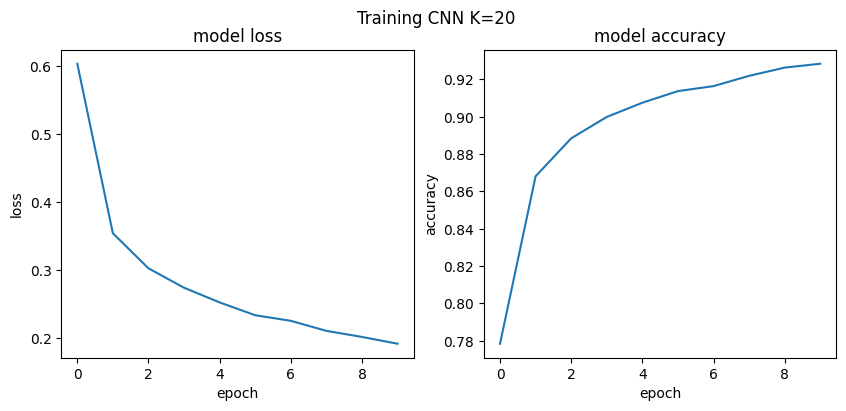

In [25]:
plot_training_metrics(history_5)

In [26]:
# Evaluation of model on test dataset
print("Performance on test data:")
loss, accuracy = model_5.evaluate(test_images, test_labels, verbose=2)

Performance on test data:
313/313 - 2s - loss: 0.2481 - accuracy: 0.9084 - 2s/epoch - 8ms/step


The residual connections are capable of unlocking the training of deep CNNs.